In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('database_elt_main.db')
curr = conn.cursor()

In [3]:
curr.execute("SELECT * FROM Inverted_Index")

In [4]:
word_data = curr.fetchall()
word_data[0]

('photography',
 2046,
 '{1: 6, 2: 7, 3: 10, 4: 11, 5: 16, 6: 6, 7: 23, 8: 22, 9: 46, 10: 30, 11: 46, 12: 17, 13: 30, 14: 28, 15: 6, 16: 3, 17: 9, 18: 6, 19: 7, 20: 10, 21: 11, 22: 16, 23: 6, 24: 23, 25: 22, 26: 79, 27: 17, 28: 9, 29: 28, 30: 13, 31: 22, 32: 45, 33: 47, 34: 28, 35: 7, 36: 7, 37: 17, 38: 44, 39: 45, 40: 44, 41: 12, 42: 47, 43: 12, 44: 13, 45: 8, 46: 9, 47: 13, 48: 9, 49: 9, 50: 5, 51: 8, 52: 8, 53: 7, 54: 18, 55: 7, 56: 6, 57: 6, 58: 6, 59: 6, 60: 3, 61: 11, 62: 3, 63: 7, 64: 7, 65: 8, 66: 22, 67: 22, 68: 7, 69: 7, 70: 11, 71: 14, 72: 5, 73: 7, 74: 21, 75: 21, 76: 21, 77: 23, 78: 10, 79: 18, 80: 12, 81: 9, 82: 21, 83: 9, 84: 20, 85: 19, 86: 8, 87: 7, 88: 16, 89: 10, 90: 16, 91: 15, 92: 17, 93: 7, 94: 13, 95: 13, 96: 41, 97: 13, 98: 10, 99: 17, 100: 7, 101: 11, 102: 7, 103: 15, 104: 11, 105: 16, 106: 5, 107: 28, 108: 10, 109: 17, 110: 7, 111: 7, 112: 5, 113: 26, 114: 18, 115: 15, 116: 10, 117: 5, 118: 7, 119: 5, 120: 5, 121: 5, 122: 5, 123: 6, 124: 17, 125: 10, 126: 8, 1

In [5]:
word_data[0][0], word_data[0][1]

('photography', 2046)

In [6]:
import pandas as pd

In [7]:
# create dataframe col: word, documnet_frequency
dataframe = pd.DataFrame(word_data)
dataframe.rename(columns={0: 'word', 1: 'document_frequency'}, inplace=True)
dataframe[:10]

,word,document_frequency,2
0,photography,2046,"{1: 6, 2: 7, 3: 10, 4: 11, 5: 16, 6: 6, 7: 23,..."
1,life,1905,"{1: 4, 2: 2, 3: 6, 4: 4, 5: 8, 6: 2, 7: 2, 8: ..."
2,pl,1238,"{1: 1, 2: 1, 3: 1, 4: 1, 5: 11, 6: 2, 7: 1, 8:..."
3,provide,1497,"{1: 6, 2: 1, 3: 7, 4: 1, 5: 11, 6: 2, 7: 3, 8:..."
4,various,1355,"{1: 1, 2: 3, 3: 1, 4: 1, 5: 1, 6: 1, 7: 3, 8: ..."
5,digital,1579,"{1: 1, 2: 3, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: ..."
6,news,1545,"{1: 1, 2: 3, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: ..."
7,review,1510,"{1: 4, 2: 3, 3: 14, 4: 3, 5: 15, 6: 4, 7: 3, 8..."
8,article,2063,"{1: 6, 2: 5, 3: 10, 4: 3, 5: 5, 6: 4, 7: 7, 8:..."
9,tip,1512,"{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: ..."


In [8]:
# sort by document_frequency
dataframe.sort_values(by=['document_frequency'], ascending=False, inplace=True)
dataframe

,word,document_frequency,2
8,article,2063,"{1: 6, 2: 5, 3: 10, 4: 3, 5: 5, 6: 4, 7: 7, 8:..."
0,photography,2046,"{1: 6, 2: 7, 3: 10, 4: 11, 5: 16, 6: 6, 7: 23,..."
36,use,1967,"{1: 14, 2: 6, 3: 44, 4: 2, 5: 23, 6: 7, 7: 10,..."
12,photographer,1935,"{1: 1, 2: 7, 3: 6, 4: 9, 5: 5, 6: 2, 7: 13, 8:..."
1,life,1905,"{1: 4, 2: 2, 3: 6, 4: 4, 5: 8, 6: 2, 7: 2, 8: ..."
...,...,...,...
25784,xlnt,0,{}
25783,a9000,0,{}
25782,a7siv,0,{}
25780,windeguy,0,{}


In [9]:
# remove row that has document_frequency = 0
dataframe = dataframe[dataframe.document_frequency != 0]
dataframe

,word,document_frequency,2
8,article,2063,"{1: 6, 2: 5, 3: 10, 4: 3, 5: 5, 6: 4, 7: 7, 8:..."
0,photography,2046,"{1: 6, 2: 7, 3: 10, 4: 11, 5: 16, 6: 6, 7: 23,..."
36,use,1967,"{1: 14, 2: 6, 3: 44, 4: 2, 5: 23, 6: 7, 7: 10,..."
12,photographer,1935,"{1: 1, 2: 7, 3: 6, 4: 9, 5: 5, 6: 2, 7: 13, 8:..."
1,life,1905,"{1: 4, 2: 2, 3: 6, 4: 4, 5: 8, 6: 2, 7: 2, 8: ..."
...,...,...,...
29105,rumble,1,{1547:2}
29104,rehbein,1,{1547:2}
29102,cleft,1,{1547:4}
29101,thickets,1,{1547:2}


In [10]:
# count number of words
word_amount = dataframe.shape[0]
word_amount

44019

In [11]:
import matplotlib.pyplot as plt
import numpy as np

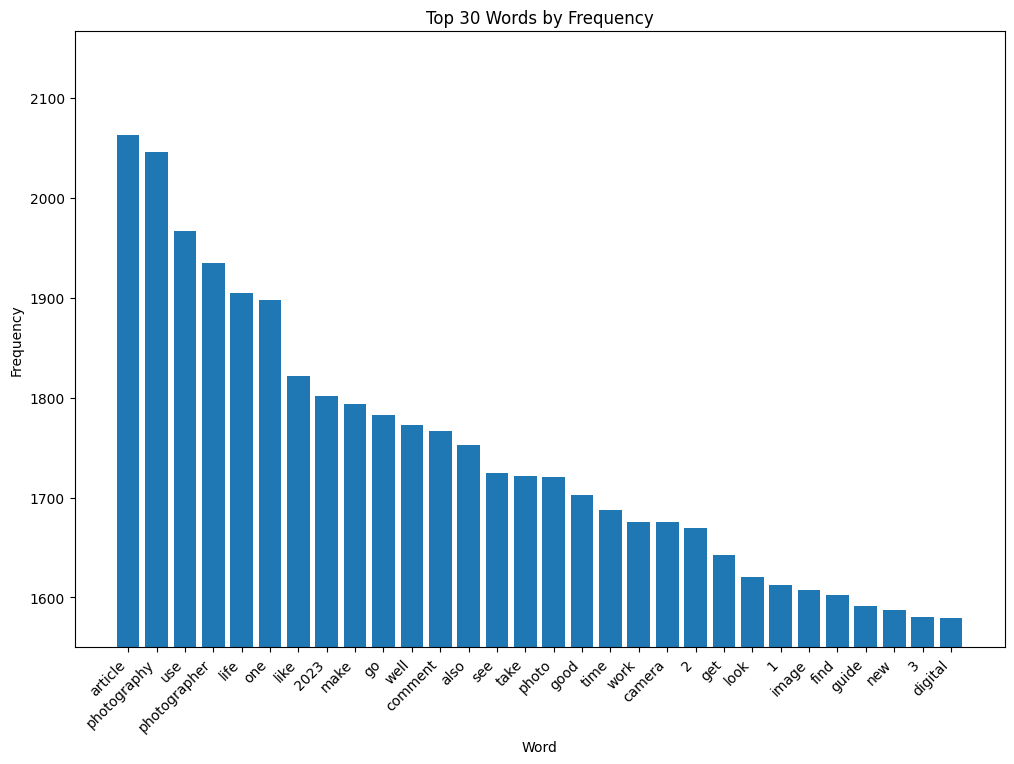

In [19]:
top_n = 30 # Change this to the number of top words you want to display
top_words_df = dataframe[:top_n]
freq_rank_10 = dataframe.iloc[top_n]['document_frequency']
plt.figure(figsize=(12, 8))
plt.bar(top_words_df['word'], top_words_df['document_frequency'])

# Set the y-axis limits to start at a value greater than zero
plt.ylim(ymin=freq_rank_10-20)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Words by Frequency')
plt.show()

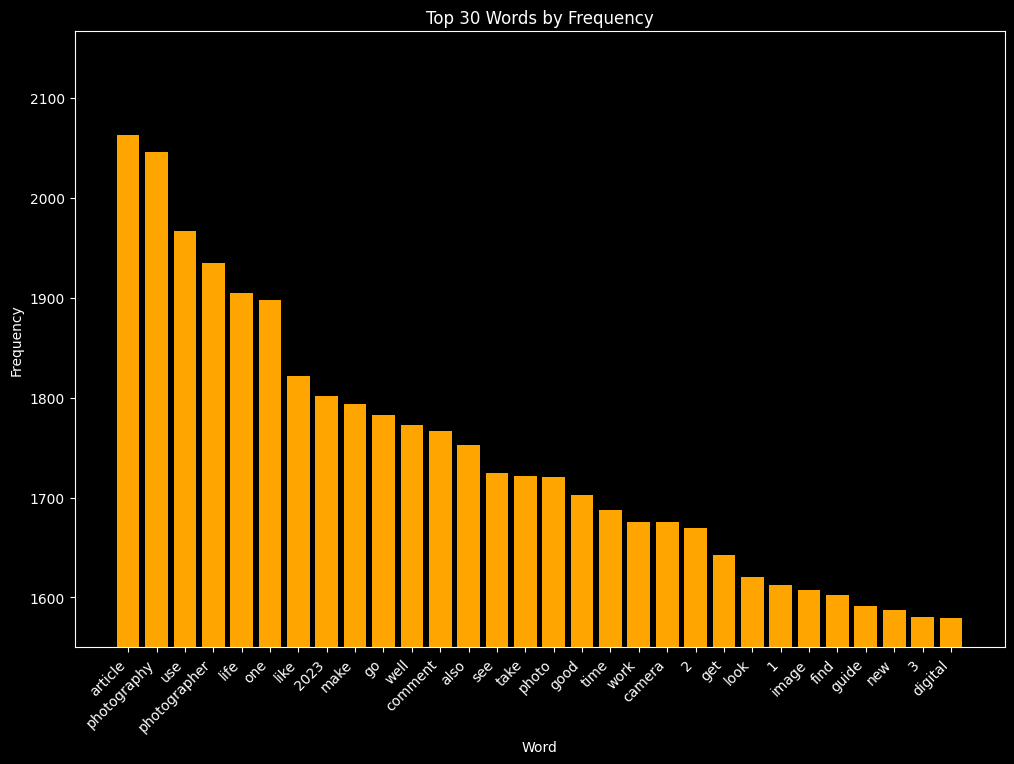

In [25]:
import matplotlib.pyplot as plt

# Set the custom style with black background
plt.style.use('dark_background')

top_n = 30 # Change this to the number of top words you want to display
top_words_df = dataframe[:top_n]
freq_rank_10 = dataframe.iloc[top_n]['document_frequency']

plt.figure(figsize=(12, 8))

# Set the color of the bars to yellow
plt.bar(top_words_df['word'], top_words_df['document_frequency'], color='orange')

# Set the y-axis limits to start at a value greater than zero
plt.ylim(ymin=freq_rank_10-20)

# Set the color of the x-axis and y-axis labels and the title to white
plt.xticks(color='white', rotation=45, ha='right')
plt.yticks(color='white')
plt.xlabel('Word', color='white')
plt.ylabel('Frequency', color='white')
plt.title(f'Top {top_n} Words by Frequency', color='white')

plt.show()


'\n\n<style>\n\n</style>\n\n<div id="fig_el352414904089416647105774377"></div>\n<script>\nfunction mpld3_load_lib(url, callback){\n  var s = document.createElement(\'script\');\n  s.src = url;\n  s.async = true;\n  s.onreadystatechange = s.onload = callback;\n  s.onerror = function(){console.warn("failed to load library " + url);};\n  document.getElementsByTagName("head")[0].appendChild(s);\n}\n\nif(typeof(mpld3) !== "undefined" && mpld3._mpld3IsLoaded){\n   // already loaded: just create the figure\n   !function(mpld3){\n       \n       mpld3.draw_figure("fig_el352414904089416647105774377", {"width": 1200.0, "height": 800.0, "axes": [{"bbox": [0.125, 0.10999999999999999, 0.775, 0.77], "xlim": [-1.8900000000000001, 30.89], "ylim": [1550.0, 2166.15], "xdomain": [-1.8900000000000001, 30.89], "ydomain": [1550.0, 2166.15], "xscale": "linear", "yscale": "linear", "axes": [{"position": "bottom", "nticks": 30, "tickvalues": null, "tickformat_formatter": "", "tickformat": null, "scale": "linea

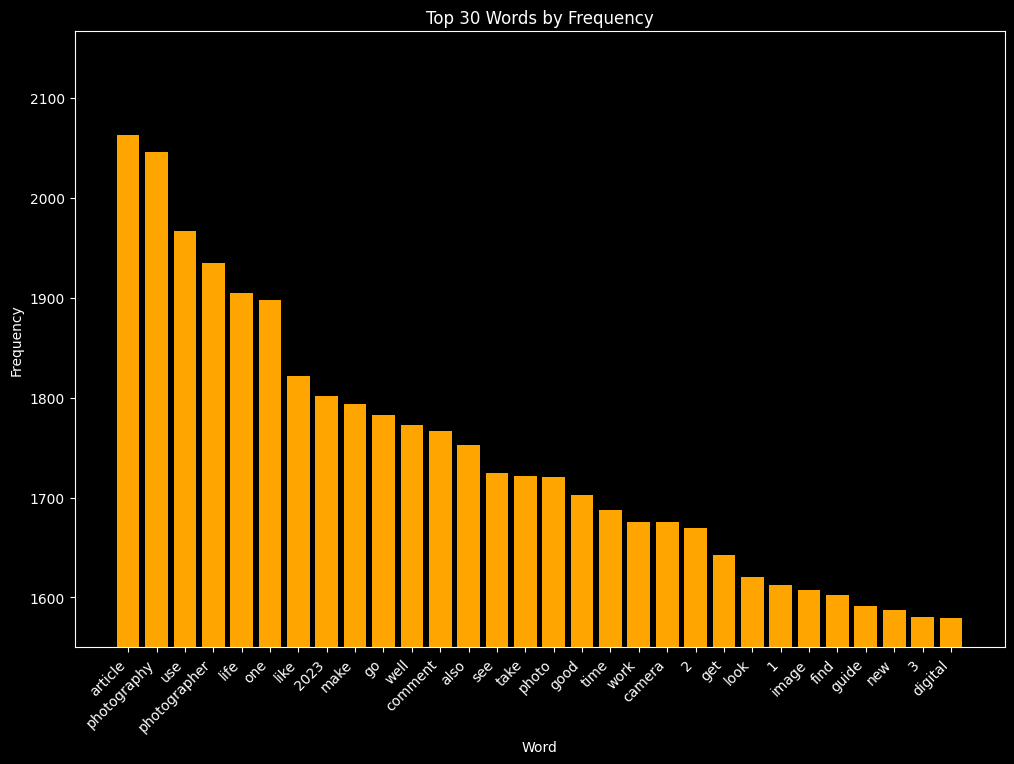

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

# Set the custom style with black background
plt.style.use('dark_background')

top_n = 30 # Change this to the number of top words you want to display
top_words_df = dataframe[:top_n]
freq_rank_10 = dataframe.iloc[top_n]['document_frequency']

fig, ax = plt.subplots(figsize=(12, 8))

# Set the color of the bars to yellow
bars = ax.bar(top_words_df['word'], top_words_df['document_frequency'], color='orange')

# Set the y-axis limits to start at a value greater than zero
ax.set_ylim(ymin=freq_rank_10-20)

# Set the color of the x-axis and y-axis labels and the title to white
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_xlabel('Word', color='white')
ax.set_ylabel('Frequency', color='white')
ax.set_title(f'Top {top_n} Words by Frequency', color='white')

# Convert the plot to an HTML format using mpld3
html = mpld3.fig_to_html(fig)

html

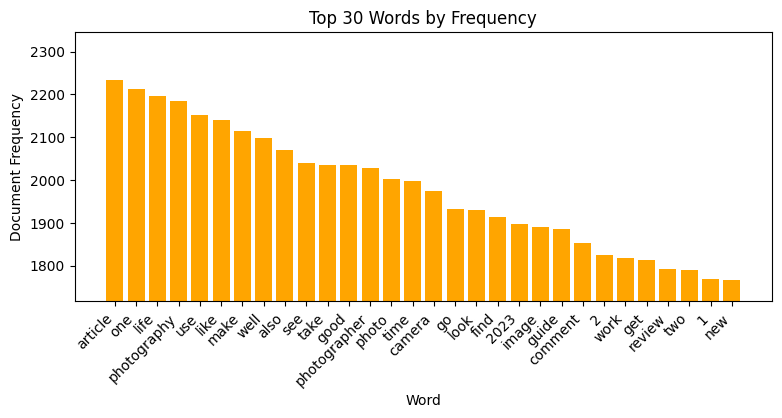

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
import mpld3

conn = sqlite3.connect('database_elt_main.db')
curr = conn.cursor()

curr.execute("SELECT * FROM Inverted_Index")
word_data = curr.fetchall()
dataframe = pd.DataFrame(word_data)
dataframe.rename(columns={0: 'word', 1: 'document_frequency'}, inplace=True)
dataframe.sort_values(by=['document_frequency'], ascending=False, inplace=True)
dataframe = dataframe[dataframe.document_frequency != 0]

# Set the custom style with black background
# plt.style.use('dark_background')

top_n = 30 # Change this to the number of top words you want to display
top_words_df = dataframe[:top_n]
freq_rank_10 = dataframe.iloc[top_n]['document_frequency']

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=(900*px, 350*px))

# Set the color of the bars to yellow
bars = ax.bar(top_words_df['word'], top_words_df['document_frequency'], color='orange')

# Set the y-axis limits to start at a value greater than zero
ax.set_ylim(ymin=freq_rank_10-20)

# Set the color of the x-axis and y-axis labels and the title to white
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_xlabel('Word', color='black')
ax.set_ylabel('Document Frequency', color='black')
ax.set_title(f'Top {top_n} Words by Frequency', color='black')

# save as png
plt.savefig('top_freq_word.png')

In [3]:
import sqlite3
import matplotlib.pyplot as plt

def plot_top_30_words():
    # Connect to SQLite3 database
    conn = sqlite3.connect('project\\database\\database_elt_main.db')
    cursor = conn.cursor()

    # Retrieve top 30 words with highest document frequency
    query = "SELECT Word, Document_Freq FROM Inverted_Index ORDER BY Document_Freq DESC LIMIT 30"
    cursor.execute(query)
    rows = cursor.fetchall()

    # Extract words and document frequency values
    words = [row[0] for row in rows]
    freqs = [row[1] for row in rows]

    # Plot bar graph
    plt.bar(words, freqs)
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Document Frequency')
    plt.title('Top 30 Words by Document Frequency')

    # Save plot as HTML file
    with open


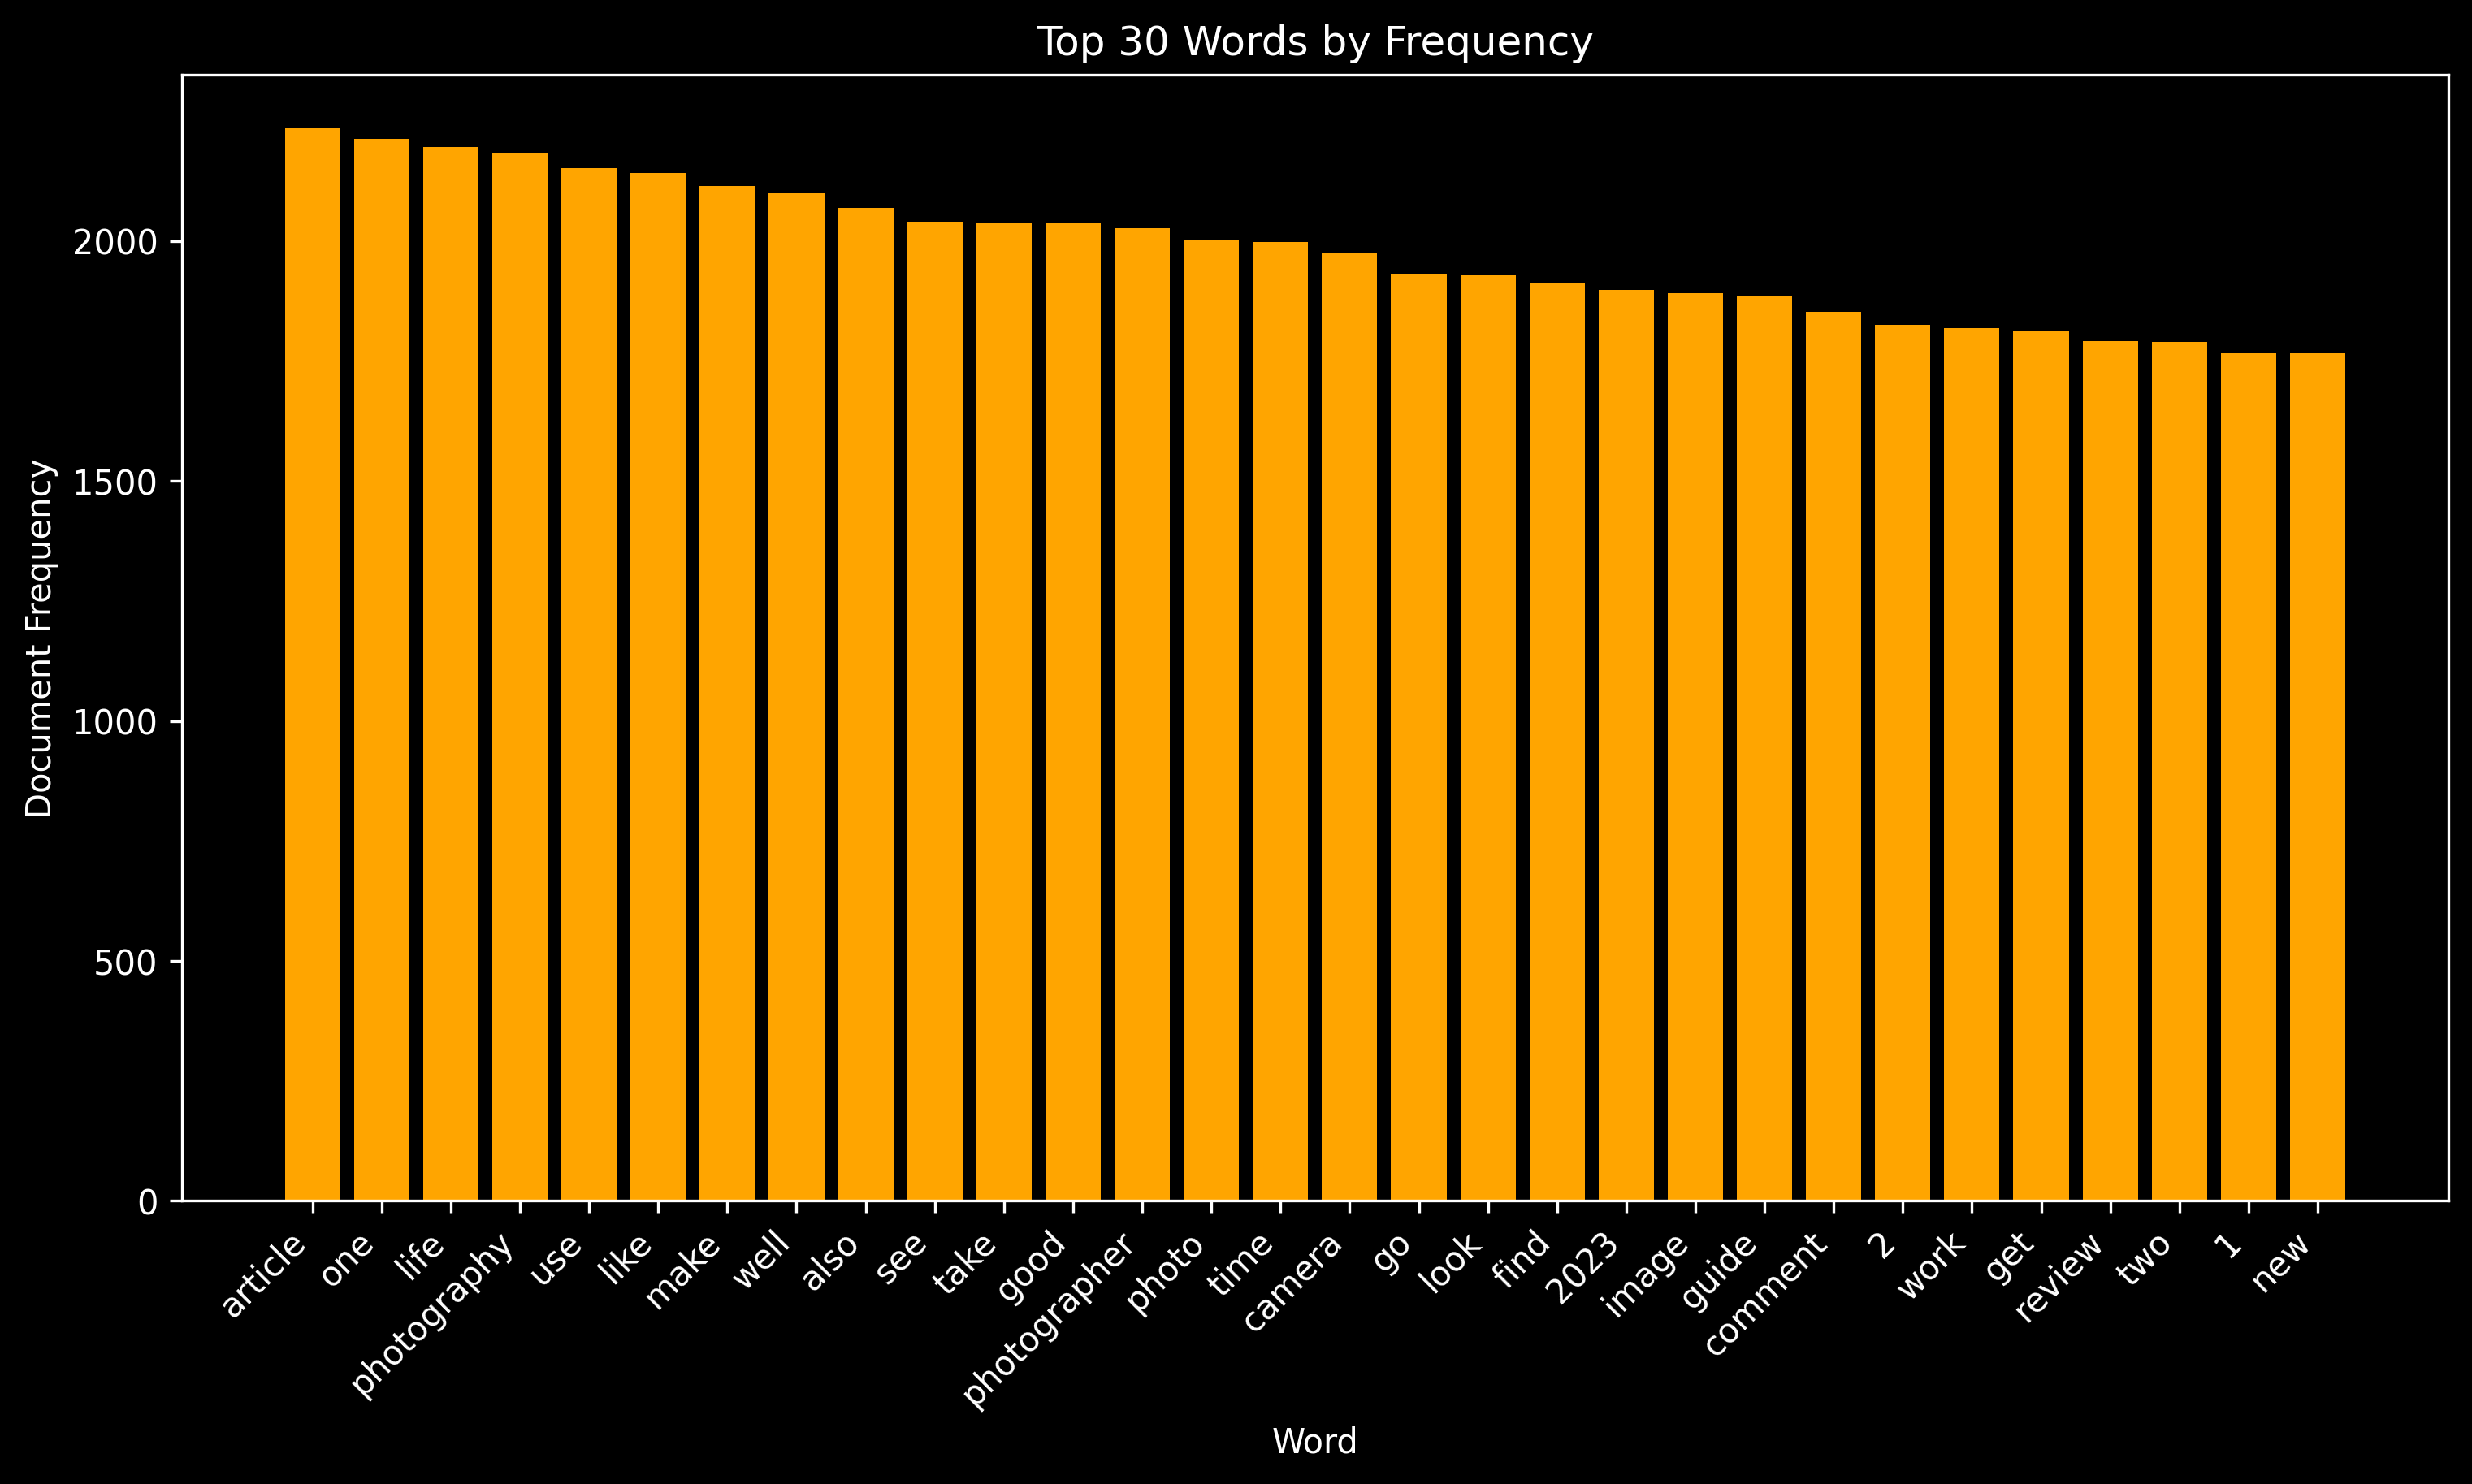

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
import mpld3

conn = sqlite3.connect('database_elt_main.db')
curr = conn.cursor()

curr.execute("SELECT * FROM Inverted_Index")
word_data = curr.fetchall()
dataframe = pd.DataFrame(word_data)
dataframe.rename(columns={0: 'word', 1: 'document_frequency'}, inplace=True)
dataframe.sort_values(by=['document_frequency'], ascending=False, inplace=True)
dataframe = dataframe[dataframe.document_frequency != 0]

top_n = 30 # Change this to the number of top words you want to display
top_words_df = dataframe[:top_n]

# Set the custom style with black background
plt.style.use('dark_background')

# Increase DPI for better quality image
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(figsize=(12, 6))

# Set the color of the bars to yellow
bars = ax.bar(top_words_df['word'], top_words_df['document_frequency'], color='orange')

# Set the y-axis limits to start at zero
ax.set_ylim(ymin=0)

plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_xlabel('Word', color='white')
ax.set_ylabel('Document Frequency', color='white')
ax.set_title(f'Top {top_n} Words by Frequency', color='white')

# Save as png
plt.savefig('top_freq_word.png', bbox_inches='tight')


In [1]:
import sqlite3

conn = sqlite3.connect('database_elt_main.db')
curr = conn.cursor()
word = "life"
curr.execute("SELECT Inverted_Dict FROM Inverted_Index WHERE Word=?", (word,))

In [2]:
data_dict = curr.fetchall()

In [7]:
eval(data_dict[0][0])

{1: 4,
 2: 2,
 3: 6,
 4: 4,
 5: 8,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 11,
 11: 2,
 12: 2,
 13: 11,
 14: 2,
 15: 4,
 16: 2,
 17: 2,
 18: 4,
 19: 2,
 20: 6,
 21: 4,
 22: 8,
 23: 2,
 24: 2,
 25: 2,
 26: 6,
 27: 2,
 28: 2,
 29: 2,
 30: 3,
 31: 2,
 32: 2,
 33: 6,
 34: 2,
 35: 4,
 36: 4,
 37: 2,
 38: 4,
 39: 2,
 40: 4,
 41: 5,
 42: 6,
 43: 5,
 44: 3,
 45: 7,
 46: 5,
 47: 2,
 48: 2,
 49: 5,
 50: 3,
 51: 2,
 52: 4,
 53: 3,
 54: 5,
 55: 6,
 56: 4,
 57: 4,
 58: 4,
 59: 2,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 4,
 65: 7,
 66: 2,
 67: 2,
 68: 3,
 69: 4,
 70: 3,
 71: 2,
 72: 4,
 73: 4,
 74: 2,
 75: 2,
 76: 10,
 77: 2,
 78: 4,
 79: 8,
 80: 12,
 81: 6,
 82: 2,
 83: 6,
 84: 2,
 85: 2,
 86: 4,
 87: 4,
 88: 2,
 89: 4,
 90: 6,
 91: 3,
 92: 4,
 93: 2,
 94: 6,
 95: 6,
 96: 2,
 97: 2,
 98: 2,
 99: 2,
 100: 4,
 101: 2,
 102: 4,
 103: 9,
 104: 6,
 105: 8,
 106: 2,
 107: 8,
 108: 4,
 109: 9,
 110: 4,
 111: 4,
 112: 4,
 113: 4,
 114: 7,
 115: 2,
 116: 4,
 117: 3,
 118: 3,
 119: 2,
 120: 2,
 121: 4,
 122: 2,
 123: 